In [48]:
import tiledb 
import matplotlib
import matplotlib.pyplot as plt


In [60]:
db=tiledb.open("/oak/stanford/groups/akundaje/projects/atlas/tiledb/tier1/dnase/",'r')

In [73]:
counts=db[157500000:157500000+1000]['count_bigwig_plus_5p']
counts.shape
counts=np.expand_dims(counts,axis=0)

Text(0.5, 1.0, 'Counts: chr1:157500000-157501000')

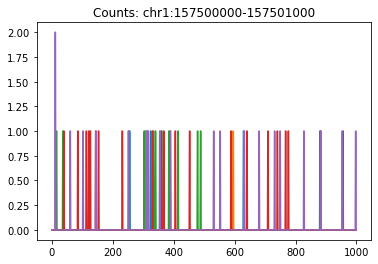

In [75]:
plt.plot(counts[0])
plt.title("Counts: chr1:157500000-157501000")

Text(0.5, 1.0, 'DNAse probabilities')

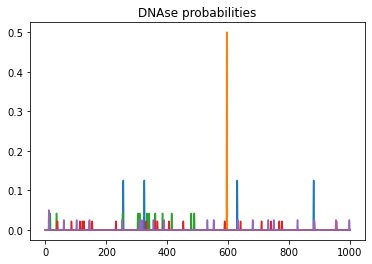

In [81]:
probs=counts/counts.sum(axis=1)
plt.plot(probs[0])
plt.title("DNAse probabilities")

(1, 1000, 5)

array([[0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001],
       ...,
       [0.001, 0.001, 0.001, 0.001, 0.026],
       [0.001, 0.001, 0.001, 0.001, 0.026],
       [0.001, 0.001, 0.001, 0.001, 0.001]], dtype=float32)

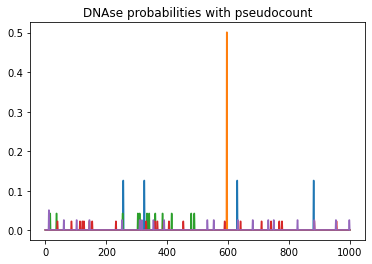

In [84]:
## add pseudocount 
probs_pseudocount=probs+(1/1000)
plt.plot(probs_pseudocount[0])
plt.title("DNAse probabilities with pseudocount")
min(probs_pseudocount)

Text(0.5, 1.0, 'Logits')

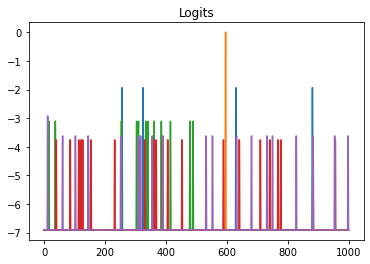

In [86]:
#go from probability to logit 
from scipy.special import logit, expit
logit_vals=logit(probs_pseudocount)
plt.plot(logit_vals[0])
plt.title("Logits")

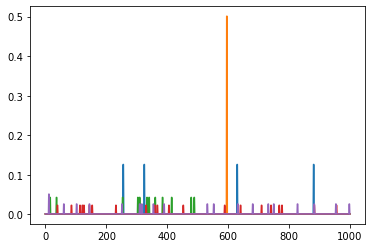

In [87]:
#recover original values 
plt.plot(expit(logit_vals)[0])